<a href="https://colab.research.google.com/github/hyalamanchi/hds5210-2023/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MyFood-a-pedia Global**: Extending MyFood-a-pedia tool developed by the United States Department of Agriculture (USDA)

# Objective


MyFood-a-pedia is a tool developed by the United States Department of Agriculture (USDA) to provide consumers with easy access to information about the nutritional content of over 1,000 commonly eaten foods. It is based on the MyPyramid Food Data, which includes information on calories, calories from solid fats, added sugars, and alcohol (extras); MyPyramid food group and subgroup amounts; and saturated fat content of over 1,000 commonly eaten foods with corresponding commonly used portion amounts.

This project involves creating a tool to efficiently provide calory content of all the food items be it fast food, restaurant food, home made foods, vegetables, fruits etc. This information is crusial for individuals working on their health and are on diet to maintain their weight. This expansion aims to enrich the MyFood-a-pedia tool build on the MyPyramid Food Data, providing consumers with an even more valuable resource for making informed and healthier choices.

This information is pivotal in helping individuals align their dietary choices with the recommendations outlined in the Dietary Guidelines for Americans. Furthermore, it plays a crucial role in weight management by shedding light on the calorie intake from "extras." To enhance the utility of this dataset, additional food items have been incorporated, encompassing a diverse range from fast-food items from various restaurants to common foods like fruits and vegetables.

The tools loads and extracts zip file containing excel and xml files of the 1,000 commonly consumed food items. It then loads extracted excel and xml files. Then it loads fast food data from github and a csv file containing more common food items like fruits, vegetables from local drive. This csv file was downloaded from kaggle. All the resources are provided below.

# Resources
- 1,000 commonly consumed foods:- (https://healthdata.gov/dataset/MyPyramid-Food-Raw-Data/ix5i-ix8v)
- Fast food data:- (https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-09-04/fastfood_calories.csv)
- Common food items like fruits, vegetables etc.,:- (https://www.kaggle.com/datasets/kkhandekar/calories-in-food-items-per-100-grams?select=calories.csv)


# Methodology
Fast food data are the list of fast food from different restaurants. It do not contains weight or quantity information. These are standard quantity served in those restaurants and for those standard quantity there are fix calory content. I will keep these food seperate in restaurant category.

Most commonly consumed food contains food item names, condiments foods added, calory content and other mineral contents. Also common food items contains food item name, its quantity, calory and other information. I will combine all these food items into general food item category.

The user have to enter the category first restaurant/general. Then user can search the food item by its name. All the information of matching items will be displayed. From those displayed information user can check its calory content so that they can manage their calory intake.

This project can be further extended. If user is doing any particular workout like jym, walking or running, this tool can be extended to suggest how much workout the user need to do after taking the searched food item.

# Libraries
Here I will load the most common libraries like **pandas**, **numpy**, **matplotlib**, **seaborn** etc.

In [1]:
# loading required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Fast food data set
In this section I will load the fast food data from github. Select the restaurant name, food item name and calory content information. I will also make some plots to check the distribution of calory contents.

In [2]:
# loading data files and printing the top few rows
df_fast_food = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-09-04/fastfood_calories.csv")
df_fast_food.head()

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
# We are primarily intrested in food item name and calory contents
# extract the required columns
df_fast_food_req = df_fast_food[['restaurant', 'item','calories']]
df_fast_food_req.head()

,restaurant,item,calories
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380
1,Mcdonalds,Single Bacon Smokehouse Burger,840
2,Mcdonalds,Double Bacon Smokehouse Burger,1130
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920


In [4]:
# summary of calories
df_fast_food_req.describe()

,calories
count,515.000000
mean,530.912621
std,282.436147
min,20.000000
25%,330.000000
50%,490.000000
75%,690.000000
max,2430.000000


Total foof items across all the restaurants are 515. Across all the restaurants mean calory per food item is 530.91 with a standard deviation of 282.43. Minimum calory is 20 and maximum calory is 2430.

In [5]:
# mean calory content for each restaurant
# data aggregation: group by restaurant
# and means, standard deviation, minimum and maximum of calories for each restaurants
df_fast_food_req.groupby('restaurant')['calories'].agg(['mean','std','min','max'])

,mean,std,min,max
restaurant,,,,
Arbys,532.727273,210.338832,70,1030
Burger King,608.571429,290.418417,190,1550
Chick Fil-A,384.444444,220.494782,70,970
Dairy Queen,520.238095,259.337694,20,1260
Mcdonalds,640.350877,410.696120,140,2430
Sonic,631.698113,300.881627,100,1350
Subway,503.020833,282.220965,50,1160
Taco Bell,443.652174,184.344883,140,880


- For Arbys restaurants mean calories values is 532.72, standard deviation is 210.33, minimum and maximum value is 70 and 1030 respectively.
- For Burger King restaurants mean calories values is 608.57, standard deviation is 290.418, minimum and maximum value is 190 and 1550 respectively.
- For Chick Fil-A restaurants mean calories values is 384.44, standard deviation is 220.49, minimum and maximum value is 70 and 970 respectively.
- For Dairy Queen restaurants mean calories values is 520.23, standard deviation is 259.33, minimum and maximum value is 20 and 1260 respectively.
- For Mcdonald restaurants mean calories values is 640.35, standard deviation is 410.69, minimum and maximum value is 140 and 2430 respectively.
- For Sonic restaurants mean calories values is 631.69, standard deviation is 300.88, minimum and maximum value is 100 and 1350 respectively.
- For Subway restaurants mean calories values is 503.02, standard deviation is 282.22, minimum and maximum value is 50 and 1160 respectively.
- For Taco Bell restaurants mean calories values is 443.65, standard deviation is 184.34, minimum and maximum value is 140 and 880 respectively.

### Pivot table
Lets use pivot table to find foods with maximum calory value in each restaurants.

In [6]:
# pivot table to find maximum calories food for each restaurant
df_fast_food_req.pivot_table(index='restaurant', values='calories',
                          aggfunc='max')

,calories
restaurant,
Arbys,1030
Burger King,1550
Chick Fil-A,970
Dairy Queen,1260
Mcdonalds,2430
Sonic,1350
Subway,1160
Taco Bell,880


this pivoting displays the max calory food for each restaurant. Lets find out the corresponding food as well:-

In [7]:
# food with max calory values for each restaurant
df_fast_food_req.loc[df_fast_food_req.groupby('restaurant')['calories'].idxmax()]

,restaurant,item,calories
175,Arbys,Triple Decker Sandwich,1030
192,Burger King,American Brewhouse King,1550
69,Chick Fil-A,30 piece Chicken Nuggets,970
270,Dairy Queen,6 Piece Chicken Strip Basket w/ Country Gravy,1260
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430
115,Sonic,Garlic Parmesan Dunked Ultimate Chicken Sandwich,1350
309,Subway,Footlong Big Hot Pastrami,1160
430,Taco Bell,XXL Grilled Stuft Burrito - Beef,880


The food items and their calory contennt for each restaurant are as follows:-
- Arbys: Triple Decker Sandwich (1030 calories)
- Burger King: American Brewhouse King (1550 calories)
- Chick Fil-A: 30 piece Chicken Nuggets	 (970 calories)
- Dairy Queen: 6 Piece Chicken Strip Basket w/ Country Gravy (1260 calories)
- McDonalds: 20 piece Buttermilk Crispy Chicken Tenders	 (2430 calories)
- Sonic: Garlic Parmesan Dunked Ultimate Chicken Sandwich (1350 calories)
- Subway: Footlong Big Hot Pastrami (1160 calories)
- Taco Bell: XXL Grilled Stuft Burrito - Beef (880 calories)

Now lets find out the foods with minimum calory content for each restaurant.

In [8]:
# pivot table to find maximum calories food for each restaurant
df_fast_food_req.pivot_table(index='restaurant', values='calories',
                          aggfunc='min')

,calories
restaurant,
Arbys,70
Burger King,190
Chick Fil-A,70
Dairy Queen,20
Mcdonalds,140
Sonic,100
Subway,50
Taco Bell,140


In [9]:
# food with min calory values for each restaurant
df_fast_food_req.loc[df_fast_food_req.groupby('restaurant')['calories'].idxmin()]

,restaurant,item,calories
187,Arbys,Chopped Side Salad,70
241,Burger King,4 Piece Chicken Nuggets,190
72,Chick Fil-A,4 Piece Grilled Chicken Nuggets,70
302,Dairy Queen,Side Salad,20
48,Mcdonalds,Premium Asian Salad w/o Chicken,140
127,Sonic,Ultimate Chicken Club,100
392,Subway,Veggie Delite Salad,50
465,Taco Bell,Fresco Crunchy Taco,140


Foods with minimum calories for each restaurat:-
- Arbys: Chopped Side Salad (70 calories)
- Burger King: 4 Piece Chicken Nuggets (190 calories)
- Chick Fil-A: 4 Piece Grilled Chicken Nuggets (70 calories)
- Dairy Queen: Side Salad (20 calories)
- McDonalds: Premium Asian Salad w/o Chicken (140 calories)
- Sonic: Ultimate Chicken Club (100 calories)
- Subway: Veggie Delite Salad (50 calories)
- Taco Bell: Fresco Crunchy Taco (140 calories)

Lets proceed with data visualization:-

Text(0.5, 1.0, 'Distribution of calories in fast food')

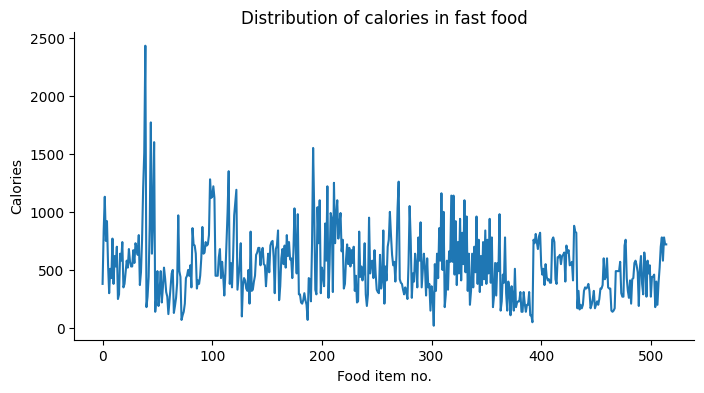

In [10]:
# Overall distribution of calories
df_fast_food_req['calories'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel("Calories")
plt.xlabel("Food item no.")
plt.title("Distribution of calories in fast food")

From the plot we observe that most of the food item have calory value around 500 to 1000.

Text(0.5, 1.0, 'Distribution of calories in fast food (Histogram)')

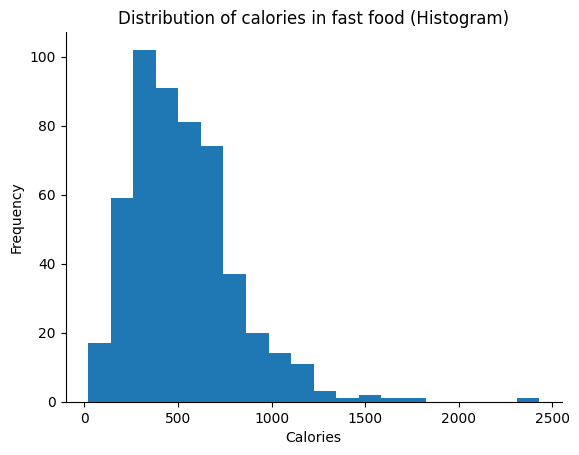

In [11]:
# histogram of calories
df_fast_food_req['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel("Frequency")
plt.xlabel("Calories")
plt.title("Distribution of calories in fast food (Histogram)")

Here also we observe that most of the calories values lies around 500.

# MyPyramid Food Raw Data

## Function to check the contents of a zip file

In [12]:
# code to download the zip file from health data website and print the data sets contained in it
# importing necessary libraries
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
zip_url = "https://inventory.data.gov/dataset/794cd3d7-4d28-4408-8f7d-84b820dbf7f2/resource/6b78ec0c-4980-4ad8-9cbd-2d6eb9eda8e7/download/myfoodapediadata.zip"

def check_zip_content(zip_url):
    """(str)->list
    Check the contents of a zip file from a given URL. It takes a url of zip file
    and prints its contents as a list.

    >>> check_zip_content("https://inventory.data.gov/dataset/794cd3d7-4d28-4408-8f7d-84b820dbf7f2/resource/6b78ec0c-4980-4ad8-9cbd-2d6eb9eda8e7/download/myfoodapediadata.zip")
    ['Food_Display_Table.xlsx',
    'Food_Display_Table.xml',
    'Foods_Needing_Condiments_Table.xlsx',
    'Foods_Needing_Condiments_Table.xml',
    'lu_Condiment_Food_Table.xlsx',
    'lu_Condiment_Food_Table.xml']
    """
    # Reading the zip file from the URL
    resp = urlopen(zip_url)

    # Reading the files contained inside the zip file
    myzip = ZipFile(BytesIO(resp.read()))

    # Returning the list of file names contained inside the zip file
    return myzip.namelist()

In [13]:
# testing the check_zip_content() function
# if this test pass we can move forward with the next function to
# download and extract the zip file contents
import doctest
doctest.run_docstring_examples(check_zip_content, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    check_zip_content("https://inventory.data.gov/dataset/794cd3d7-4d28-4408-8f7d-84b820dbf7f2/resource/6b78ec0c-4980-4ad8-9cbd-2d6eb9eda8e7/download/myfoodapediadata.zip")
Expecting:
    ['Food_Display_Table.xlsx',
    'Food_Display_Table.xml',
    'Foods_Needing_Condiments_Table.xlsx',
    'Foods_Needing_Condiments_Table.xml',
    'lu_Condiment_Food_Table.xlsx',
    'lu_Condiment_Food_Table.xml']



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



ok


This test passed. Hence we can move forward to download and extract the zip file contents.

# Function to download and extract zip file from given zip file url

In [14]:
# function to download the zip file from given url and extract its content into given directory
import requests
import os

def download_and_extract_zip(zip_file_url, download_directory):
    """(str, str)->None
    This function download a zip file from the given URL and extract its contents in the
    provided download directory.
    """
    # Make a request to download the zip file
    response = requests.get(zip_file_url)

    # Save the zip file into download directory as "downloaded_file.zip"
    zip_file_path = os.path.join(download_directory, 'downloaded_file.zip')
    with open(zip_file_path, 'wb') as zip_file:
        zip_file.write(response.content)

    # Extract all files from the zip archive
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_directory)

In [15]:
# calling the function after prviding url and download directory
zip_file_url = zip_url
download_directory = '/'
download_and_extract_zip(zip_file_url, download_directory)

## Common foods and calories content

In [16]:
# load the downloaded files
# MyPyramid Food Raw Data
df_food_table = pd.read_excel("/Food_Display_Table.xlsx")
df_food_table.head()

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.0,...,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.0,...,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,0.0,169.12,9.58720


In [17]:
# extracting the required columns
df_food_table_req = df_food_table[['Display_Name', 'Portion_Amount', 'Portion_Display_Name', 'Calories']]

# drop duplicate values
df_food_table.drop_duplicates()

# head of the data
df_food_table_req.head()

,Display_Name,Portion_Amount,Portion_Display_Name,Calories
0,Sour cream dip,0.25,cup,133.65
1,"Ice cream, regular",1.00,cup,267.33
2,"Ice cream, rich",1.00,cup,368.52
3,Soft serve ice cream,1.00,cup,347.73
4,"Ice cream bar, chocolate covered",1.00,bar (bar = 3 fl oz),169.12


In [18]:
# creating a copy of the original data
df_food_table_req = df_food_table_req.copy()

# renaming the columns to make all the general category data into similar dataframe
df_food_table_req.rename(columns={'Display_Name':'FoodItem', 'Portion_Amount':'Amount', 'Portion_Display_Name':'Measurement'}, inplace=True)
df_food_table_req.head()

,FoodItem,Amount,Measurement,Calories
0,Sour cream dip,0.25,cup,133.65
1,"Ice cream, regular",1.00,cup,267.33
2,"Ice cream, rich",1.00,cup,368.52
3,Soft serve ice cream,1.00,cup,347.73
4,"Ice cream bar, chocolate covered",1.00,bar (bar = 3 fl oz),169.12


In [19]:
# summary of the numeric columns
df_food_table_req.describe()

,Amount,Calories
count,2014.000000,2014.000000
mean,1.204692,154.371355
std,1.479900,146.052006
min,0.250000,0.000000
25%,1.000000,53.437500
50%,1.000000,115.380000
75%,1.000000,208.794000
max,20.000000,1667.400000


From the summary we observe that mean calory value is 154.37 and standard deviation is 146.

Text(0.5, 1.0, 'Distribution of calories in foods (MyPyramid Food)')

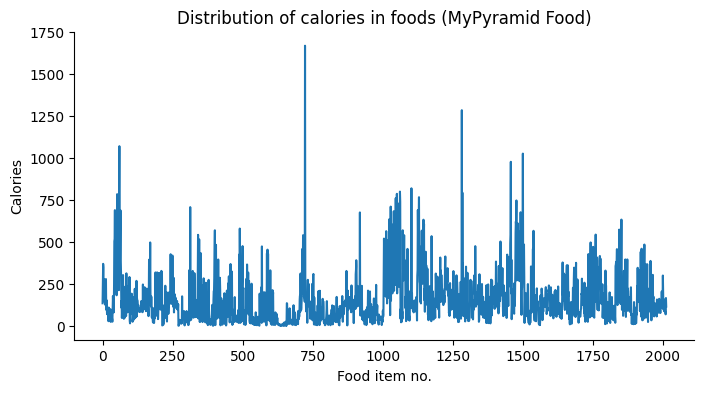

In [20]:
# overall calories distribution
df_food_table_req['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel("Calories")
plt.xlabel("Food item no.")
plt.title("Distribution of calories in foods (MyPyramid Food)")

From the plot we can observe that most of the food items have calory values around 150.

Text(0.5, 1.0, 'Histogram of calories in fast food (MyPyramid Food)')

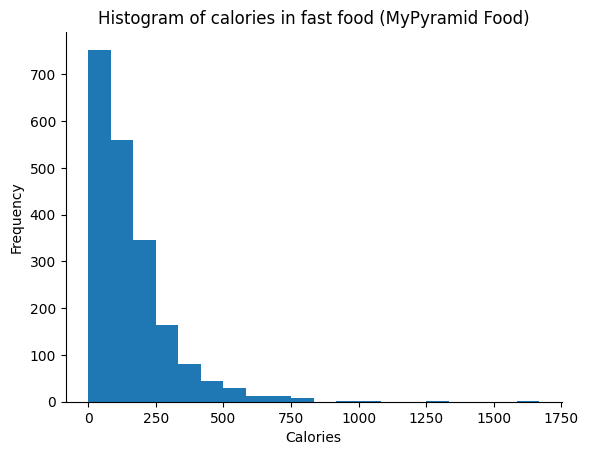

In [21]:
# histogram of calories
df_food_table_req['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel("Frequency")
plt.xlabel("Calories")
plt.title("Histogram of calories in fast food (MyPyramid Food)")

## Condiment food and calories content

In [22]:
# XML file ka path
# loading condiment food and its calories content
xml_file_path = '/lu_Condiment_Food_Table.xml'
df_condiment = pd.read_xml(xml_file_path)
df_condiment.head()

,survey_food_code,display_name,condiment_portion_size,condiment_portion_code,condiment_grains,condiment_whole_grains,condiment_vegetables,condiment_dkgreen,condiment_orange,condiment_starchy_vegetables,...,condiment_milk,condiment_meat,condiment_soy,condiment_drybeans_peas,condiment_oils,condiment_solid_fats,condiment_added_sugars,condiment_alcohol,condiment_calories,condiment_saturated_fats
0,11111000,Whole milk,1/2 cup,10205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50020,0.0,0.0,0.0,0.0,34.78464,0.0,0.0,73.20,2.26920
1,11111000,Whole milk,2 Tablespoons,30000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12505,0.0,0.0,0.0,0.0,8.69616,0.0,0.0,18.30,0.56730
2,11112210,1% milk (low fat),1/2 cup,10205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50020,0.0,0.0,0.0,0.0,9.75024,0.0,0.0,51.24,0.76860
3,11112210,1% milk (low fat),2 Tablespoons,30000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12505,0.0,0.0,0.0,0.0,2.43756,0.0,0.0,12.81,0.19215
4,11113000,Fat free milk (skim),1/2 cup,10205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.49980,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,41.65,0.14700


In [23]:
# extracting the required columns
df_condiment_req = df_condiment[['display_name', 'condiment_portion_size', 'condiment_calories']]
df_condiment_req.head()

,display_name,condiment_portion_size,condiment_calories
0,Whole milk,1/2 cup,73.20
1,Whole milk,2 Tablespoons,18.30
2,1% milk (low fat),1/2 cup,51.24
3,1% milk (low fat),2 Tablespoons,12.81
4,Fat free milk (skim),1/2 cup,41.65


In [24]:
# lets make a copy of the original data
df_condiment_req = df_condiment_req.copy()

# making amount and measurement column from condiment_portion_size column
# amount is numeric measure
# measurement is unit of measurement
df_condiment_req[['Amount', 'Measurement']] = df_condiment_req['condiment_portion_size'].str.extract(r'(\d+\.\d+|\d+|\d+/\d+)\s*([a-zA-Z]+)')

# some data were as fraction so evaluating those values
df_condiment_req['Amount'] = df_condiment_req['Amount'].apply(eval)

# assigning condiment_calories values to Calories
df_condiment_req['Calories'] = df_condiment_req['condiment_calories']

# deleting the not required columns
df_condiment_req = df_condiment_req.drop(columns=['condiment_portion_size','condiment_calories'])

# renaming column to match with other food dataframe
df_condiment_req.rename(columns={'display_name':'FoodItem'}, inplace=True)

# drop duplicate values
df_condiment.drop_duplicates()

# final dataframe
df_condiment_req.head()

,FoodItem,Amount,Measurement,Calories
0,Whole milk,0.5,cup,73.20
1,Whole milk,2.0,Tablespoons,18.30
2,1% milk (low fat),0.5,cup,51.24
3,1% milk (low fat),2.0,Tablespoons,12.81
4,Fat free milk (skim),0.5,cup,41.65


### Data aggregation

In [25]:
# aggregate calories by measurement
# This is the 2nd data aggregation
df_grp_sum = df_condiment_req.groupby('Measurement')['Calories'].agg(['mean','std'])
df_grp_sum

,mean,std
Measurement,,
Tablespoons,30.118333,29.266811
Tbsp,41.636121,25.311229
cup,64.564000,34.575517
leaf,0.800000,NaN
slice,55.950167,55.564707
tsp,20.696973,12.711345


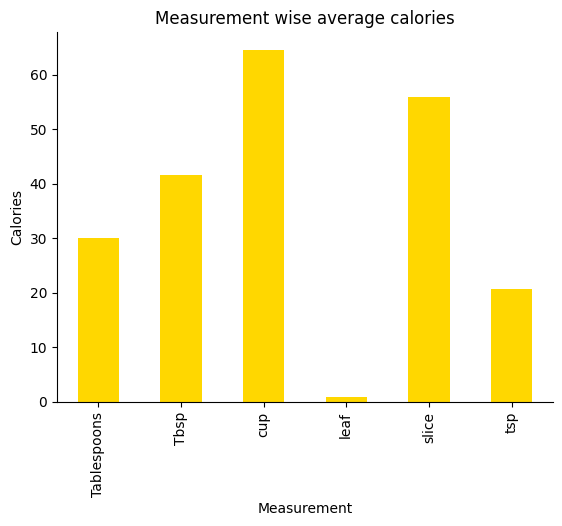

In [26]:
# barplot of measurement wise average calories
df_grp_sum['mean'].plot(kind='bar', title='mean', color='gold')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Calories')
plt.xlabel('Measurement')
plt.title('Measurement wise average calories')
plt.show()

From the above aggregated data summary and plot we observe that cup has highest average calories and leaf the least average calories. This tells condiment foods served by cup have more calories and condiments foods as leaf have least calories.

# Calories in food items per 100 g
Lets load the data of more common food items downloaded from kaggle to local drive and from there it was uploaded to colab and from there it is being loaded in this program.

In [28]:
# calories in food items data
# loading and priting data from local file
# original data were downloaded from kaggle
df_food_cal100 = pd.read_csv('/content/calories.csv')
df_food_cal100.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [29]:
# extracting the required columns
df_food_cal100_req = df_food_cal100[[ 'FoodItem', 'per100grams', 'Cals_per100grams']]
df_food_cal100_req.head()

,FoodItem,per100grams,Cals_per100grams
0,Applesauce,100g,62 cal
1,Canned Apricots,100g,48 cal
2,Canned Blackberries,100g,92 cal
3,Canned Blueberries,100g,88 cal
4,Canned Cherries,100g,54 cal


In [30]:
# creating a copy of the original data
df_food_cal100_req = df_food_cal100_req.copy()

# creating a copy of the data
df_food_cal100_req = df_food_cal100_req.copy()

# Extract numeric part into the 'amount' column and character part into the 'Measurement' column from per100grams column
df_food_cal100_req[['Amount', 'Measurement']] = df_food_cal100_req['per100grams'].str.extract(r'(\d+)([a-zA-Z]+)')
df_food_cal100_req['Calories'] = df_food_cal100_req['Cals_per100grams'].str.extract(r'(\d+)')

# Convert 'amount' column to numeric type
df_food_cal100_req['Amount'] = pd.to_numeric(df_food_cal100_req['Amount'])
df_food_cal100_req['Calories'] = pd.to_numeric(df_food_cal100_req['Calories'])

# deleting not required columns
df_food_cal100_req = df_food_cal100_req.drop(columns=['per100grams', 'Cals_per100grams'])

# drop duplicate values
df_food_cal100_req.drop_duplicates()

# final data frame
df_food_cal100_req.head()

,FoodItem,Amount,Measurement,Calories
0,Applesauce,100,g,62
1,Canned Apricots,100,g,48
2,Canned Blackberries,100,g,92
3,Canned Blueberries,100,g,88
4,Canned Cherries,100,g,54


## Data merging

Now we are done with data exploration and data preparation steps. Now lets merge all the data except 'restaurant' data into a single data frame which further can be used to search for the food items and can display the calories content

In [31]:
# merging MyPyramid Food Raw Data and condiment data
# This is the 1st data join or we can say data merging
df_merged1 = pd.concat([df_food_table_req, df_condiment_req], ignore_index=True)
df_merged1.head()

,FoodItem,Amount,Measurement,Calories
0,Sour cream dip,0.25,cup,133.65
1,"Ice cream, regular",1.00,cup,267.33
2,"Ice cream, rich",1.00,cup,368.52
3,Soft serve ice cream,1.00,cup,347.73
4,"Ice cream bar, chocolate covered",1.00,bar (bar = 3 fl oz),169.12


In [32]:
# merging common food items data from kaggle to previously merged data of MyPyramid Food Raw Data and condiment data
# This is the 2nd data join or we can say data merging
df_merged2 = pd.concat([df_merged1, df_food_cal100_req], ignore_index=True)
df_merged2.head()

,FoodItem,Amount,Measurement,Calories
0,Sour cream dip,0.25,cup,133.65
1,"Ice cream, regular",1.00,cup,267.33
2,"Ice cream, rich",1.00,cup,368.52
3,Soft serve ice cream,1.00,cup,347.73
4,"Ice cream bar, chocolate covered",1.00,bar (bar = 3 fl oz),169.12


# Function to find food item and their calory information

Now lets define a function which will help the user search for the food items and display the calory content.

Here I will start by defining two functions which searches food items in fast food and general food item category. Then I will test those functions and later I will use those function into another function to search for the food item.

In [33]:
# function to search for food item in fast food items
# restaurant food items
def search_in_fast_food(food_name):
    """(str)->pd.DataFrame()
    This function takes a fast food item name which is generally served in some restaurant and returns
    a dataframe containing restaurant name, food item name and its calory content. This function makes input
    food item to lower case and also makes food items in the dataframe to lower case then it checks for its
    presence. Hence this function is case insensetive i.e. it will work for both small case as well as
    capital case alphabets.

    >>> search_in_fast_food('Double Bacon Smokehouse Burger')
       restaurant               item               calories
    0  Mcdonalds   Double Bacon Smokehouse Burger      1130

    >>> search_in_fast_food('Crispy Bacon Smokehouse Chicken Sandwich')
          restaurant                                      item  calories
    0  Mcdonalds  Crispy Bacon Smokehouse Chicken Sandwich       920
    """
    return df_fast_food_req[df_fast_food_req['item'].str.lower() == food_name.lower()].reset_index(drop=True)

In [34]:
# testing the search_in_fast_food() function
import doctest
doctest.run_docstring_examples(search_in_fast_food, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    search_in_fast_food('Double Bacon Smokehouse Burger')
Expecting:
       restaurant               item               calories
    0  Mcdonalds   Double Bacon Smokehouse Burger      1130
ok
Trying:
    search_in_fast_food('Crispy Bacon Smokehouse Chicken Sandwich')
Expecting:
          restaurant                                      item  calories
    0  Mcdonalds  Crispy Bacon Smokehouse Chicken Sandwich       920
ok


We can see all the doctest for the search_in_fast_food() is passed.

In [35]:
# function to search for food item in general food items
def search_in_general_food(food_name):
    """(str)->pd.DataFrame()
    This function takes a fast food item name which is generally served in some restaurant and returns
    a dataframe containing restaurant name, food item name and its calory content. This function makes input
    food item to lower case and also makes food items in the dataframe to lower case then it checks for its
    presence. Hence this function is case insensetive i.e. it will work for both small case as well as
    capital case alphabets.

    >>> search_in_general_food('apple')
          FoodItem  Amount Measurement  Calories
    0    Apple   100.0           g      52.0

    >>> search_in_general_food('mango')
          FoodItem  Amount Measurement  Calories
    0    Mango   100.0           g      60.0
    1    Mango   100.0           g      60.0
    """
    return df_merged2[df_merged2['FoodItem'].str.lower() == food_name.lower()].reset_index(drop=True)

In [36]:
# testing the search_in_general_food() function
import doctest
doctest.run_docstring_examples(search_in_general_food, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    search_in_general_food('apple')
Expecting:
          FoodItem  Amount Measurement  Calories
    0    Apple   100.0           g      52.0
ok
Trying:
    search_in_general_food('mango')
Expecting:
          FoodItem  Amount Measurement  Calories
    0    Mango   100.0           g      60.0
    1    Mango   100.0           g      60.0
ok


We can see all the doctest for the search_in_general_food() is passed.

Lets proceed to use the previous two functions and create a main function to search for the food items

In [37]:
# function to search the food items and print their calory information
def search_food_information():
    """(None)->None
    Search for food information based on user input for food category and food name. for restaurant
    enter 'restaurant' then enter food item name. For other food item enter 'general' then enter food item name.
    """
    # below code asks user for input
    category = input("Enter food category (Restaurant/General): ").lower()

    if category == "restaurant":
        # ask user for food name if intered category is correct
        food_name = input("Enter food name: ").lower()
        # Searching in df_fast_food_req
        result_df = search_in_fast_food(food_name)

    elif category == "general":
        # ask user for food name if intered category is correct
        food_name = input("Enter food name: ").lower()
        # Searching in merged2
        result_df = search_in_general_food(food_name)
    else:
        print("Invalid food category.")
        return

    # Displaying the result
    if not result_df.empty:
        print(result_df)
    else:
        print(f"No information found for {food_name} in the specified category.")

In [45]:
from types import GenericAlias
# Calling the function
search_food_information ()

Enter food category (Restaurant/General): general
Enter food name: apple
  FoodItem  Amount Measurement  Calories
0    Apple   100.0           g      52.0
